# Нэмэгдүүлсэн өгөгдлийн шинжилгээ

## Шаардлагатай сангуудаа импортлох

In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl   
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks, savgol_filter
import glob

In [74]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

mpl.rc('figure.subplot', left=.2, right=.8, bottom=.2, top=.8)
width, height = 20, 6
mpl.rcParams['figure.figsize'] = [width, height]

sns.set_context("paper", rc={"lines.linewidth": 1})
sns.set_style('white')

## Өгөгдлөө унших

In [4]:
dataset = pd.read_csv('../../input/synthetic_data/spectrum.csv', low_memory=False)

In [103]:
# dataset.to_csv('../../input/synthetic_data/spectrum.csv',  index=None)

In [10]:
display(dataset.head().T)

,0,1,2,3,4
320,23.767617,6.554332,-65.876227,-3.539452,-32.211329
321,8.541673,-3.982771,-52.107447,-25.36141,3.569451
322,-6.737708,-12.508809,-43.797257,-22.890028,-25.360113
323,-13.844851,-14.161707,-34.973131,-15.633461,-24.382165
324,-15.338898,-11.528857,-24.758405,-24.196508,-13.837212
...,...,...,...,...,...
diagnosis,blank,blank,blank,blank,blank
classfication,0,0,0,0,0
negpos,0,0,0,0,0
medium,NaN,NaN,NaN,NaN,NaN


In [88]:
dataset.shape

(6400, 1338)

In [89]:
dataset.columns

Index(['320', '321', '322', '323', '324', '325', '326', '327', '328', '329',
       ...
       '1648', '1649', '1650', 'concentration', 'diagnosis', 'classfication',
       'negpos', 'medium', 'mediumclassification', 'covid_status'],
      dtype='object', length=1338)

In [21]:
dataset.loc[:, 'concentration':]

,concentration,diagnosis,classfication,negpos,medium,mediumclassification
0,NaN,blank,0,0,NaN,NaN
1,NaN,blank,0,0,NaN,NaN
2,NaN,blank,0,0,NaN,NaN
3,NaN,blank,0,0,NaN,NaN
4,NaN,blank,0,0,NaN,NaN
...,...,...,...,...,...,...
6395,100pg,S protein,1,1,0.0,2.0
6396,100pg,S protein,1,1,0.0,2.0
6397,100pg,S protein,1,1,0.0,2.0
6398,100pg,S protein,1,1,0.0,2.0


In [90]:
labels = dataset.columns[-7:]
display(labels)

Index(['concentration', 'diagnosis', 'classfication', 'negpos', 'medium',
       'mediumclassification', 'covid_status'],
      dtype='object')

In [91]:
for label in labels:
    print(f'NaN values in {label}: {dataset.loc[:, label].isna().sum()}')

NaN values in concentration: 1000
NaN values in diagnosis: 0
NaN values in classfication: 0
NaN values in negpos: 0
NaN values in medium: 1000
NaN values in mediumclassification: 2500
NaN values in covid_status: 0


In [92]:
for label in labels:
    display(dataset.loc[:, label].value_counts())

100ng    1200
1ng       900
10ng      900
25pg      600
50pg      600
100pg     600
1ug       300
250pg     300
Name: concentration, dtype: int64

VLP protein                     1800
S protein                       1800
VLP protein untreated saliva    1500
blank                           1000
Streptavidin                     300
Name: diagnosis, dtype: int64

2    1800
1    1800
3    1500
0    1000
4     300
Name: classfication, dtype: int64

1    5100
0    1300
Name: negpos, dtype: int64

0.0    3900
1.0    1500
Name: medium, dtype: int64

1.0    1800
2.0    1800
0.0     300
Name: mediumclassification, dtype: int64

positive    5100
negative    1300
Name: covid_status, dtype: int64

In [86]:
# dataset['negpos'] = np.where(dataset['diagnosis'].isin(['blank', 'Streptavidin']), 0, 1)
# dataset['covid_status'] = np.where(dataset['diagnosis'].isin(['blank', 'Streptavidin']), 'negative', 'positive')

In [93]:
X = dataset.drop(labels, axis=1)
X.columns = X.columns.astype(int)
y_diagnosis = dataset['diagnosis']
y_covid_status = dataset['covid_status']

In [54]:
diagnosis_map = {
    0 : 'blank',
    1 : 'S protein',
    2 : 'VLP protein',
    3 : 'VLP protein untreated saliva',
    4 : 'Streptavidin',
}

covid_status_map = {
    0 : 'Negative',
    1 : 'Positive'
}

In [81]:
wavelength = X.columns
intensity = X.values

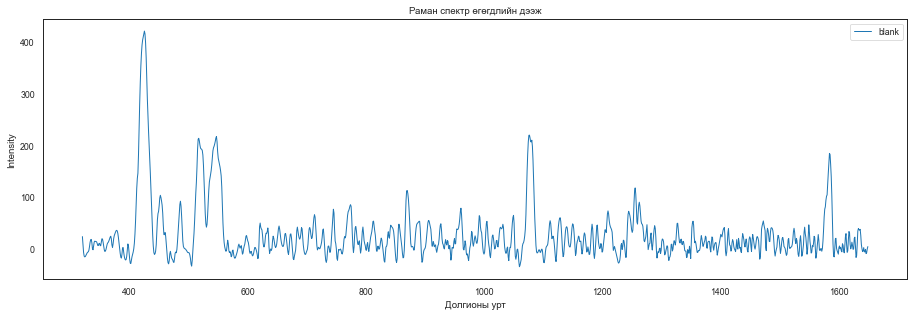

In [98]:
plt.figure()
sns.lineplot(x=wavelength, y=intensity[0], label=f'{y_diagnosis[0]}')
plt.title("Раман спектр өгөгдлийн дээж")
plt.xlabel('Долгионы урт')
plt.ylabel('Intensity')
plt.legend()

plt.show()

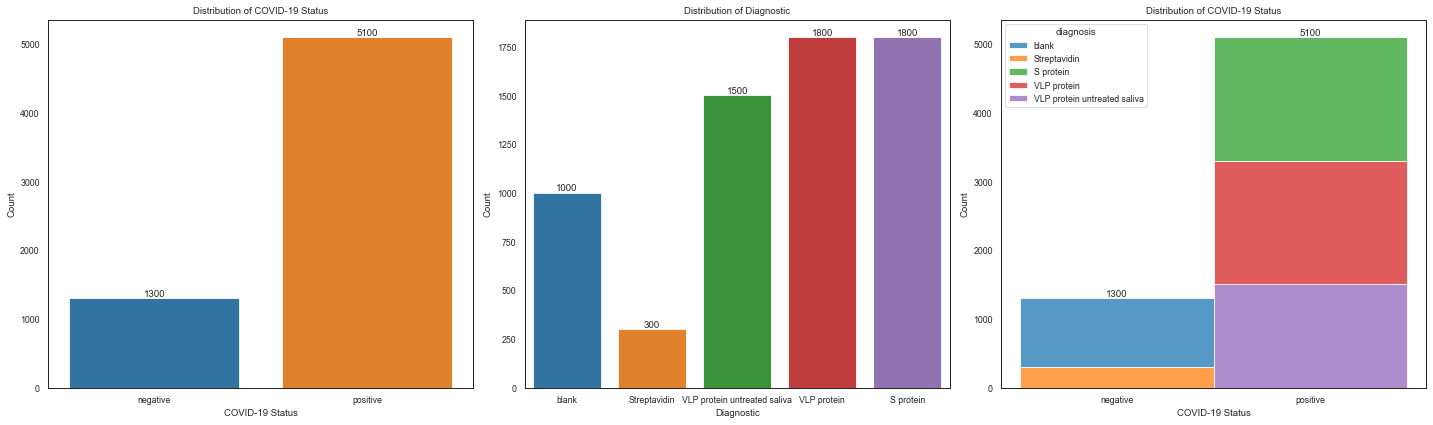

In [96]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

sns.countplot(x=y_covid_status, ax=axs[0])
abs_values_covid_status = y_covid_status.value_counts().values
axs[0].bar_label(container=axs[0].containers[0], label=abs_values_covid_status)
axs[0].set_xlabel('COVID-19 Status')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of COVID-19 Status')

sns.countplot(x=y_diagnosis, ax=axs[1])
abs_values_diagnostic = y_diagnosis.value_counts().values
axs[1].bar_label(container=axs[1].containers[0], label=abs_values_diagnostic)
axs[1].set_xlabel('Diagnostic')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Diagnostic')

sns.histplot(data=dataset.sort_values('covid_status'), x='covid_status', hue='diagnosis', ax=axs[2], multiple="stack")
axs[2].bar_label(container=axs[0].containers[0], label=abs_values_covid_status)
axs[2].set_xlabel('COVID-19 Status')
axs[2].set_ylabel('Count')
axs[2].set_title('Distribution of COVID-19 Status')

plt.tight_layout()
# plt.savefig('../figures/DistributionOfLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
# plt.savefig('../figures/Paper_DistributionOfLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

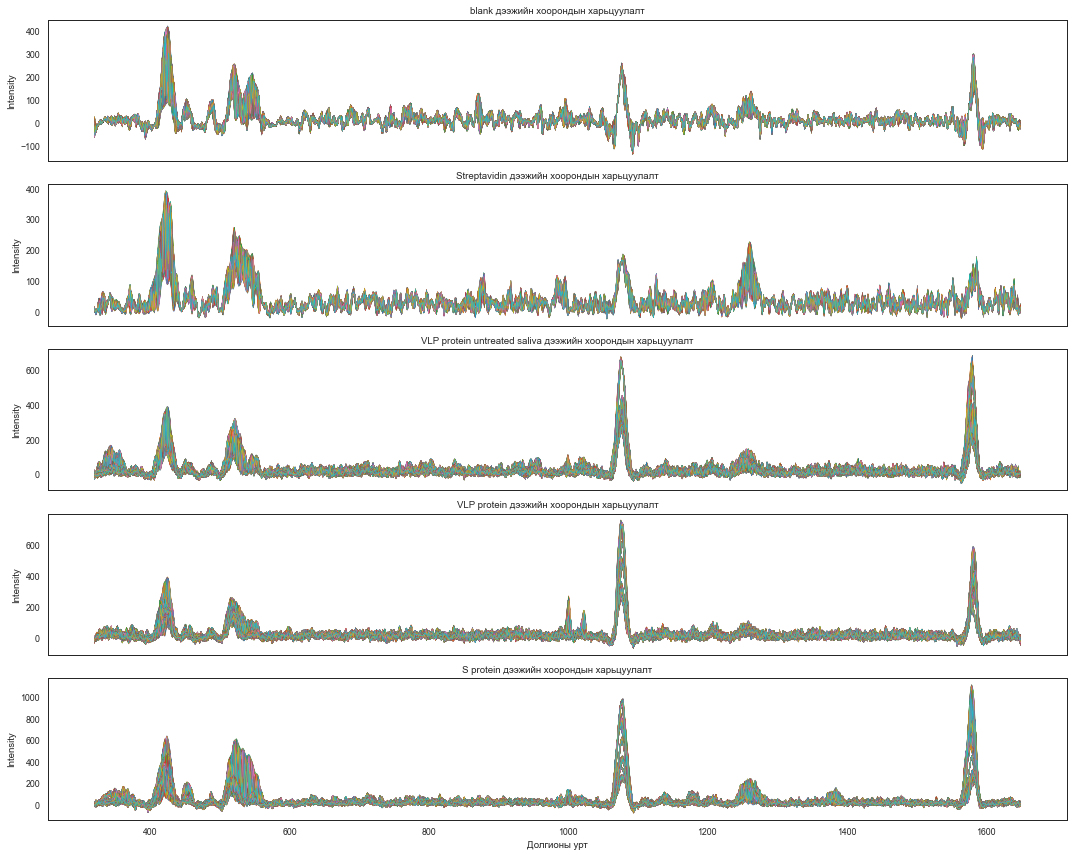

In [97]:
num_diagnosis = y_diagnosis.unique()
fig, axs = plt.subplots(len(num_diagnosis), 1, sharex=True, figsize=(15, 12))

for i, diagnosis in enumerate(num_diagnosis):
    filtered_intensity = intensity[y_diagnosis == diagnosis]

    for j in range(len(filtered_intensity)):
        axs[i].plot(wavelength, filtered_intensity[j], linewidth=0.5)
        axs[i].set_ylabel('Intensity')
    axs[i].set_title(f'{diagnosis} дээжийн хоорондын харьцуулалт')

axs[len(num_diagnosis) - 1].set_xlabel('Долгионы урт')
plt.tight_layout()

# plt.savefig('../figures/ComparisonOfEachLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
# plt.savefig('../figures/Paper_ComparisonOfEachLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [99]:
multiclass_mean_spectrum = X.assign(diagnosis=y_diagnosis)
multiclass_mean_spectrum = multiclass_mean_spectrum.groupby('diagnosis').mean()

avg_intensity = multiclass_mean_spectrum.values
avg_y = multiclass_mean_spectrum.index.tolist()

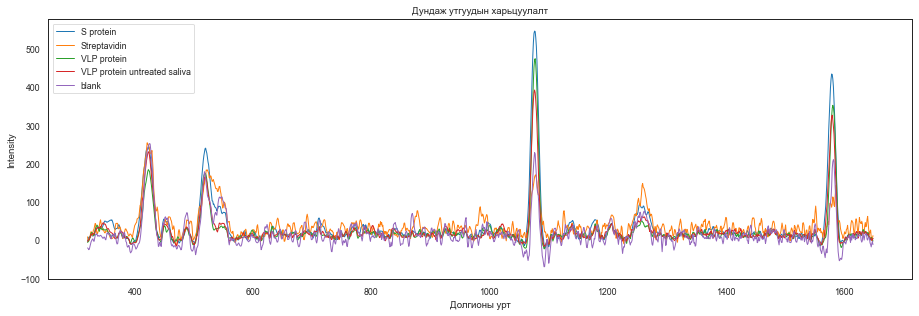

In [100]:
fig, ax = plt.subplots()

for i in range(len(avg_intensity)):
    ax.plot(wavelength, avg_intensity[i], label=f'{avg_y[i]}')

ax.set_xlabel('Долгионы урт')
ax.set_ylabel('Intensity')
ax.set_title('Дундаж утгуудын харьцуулалт')
ax.legend()

# plt.savefig('../figures/ComparisonOfMeanSpectrumOfLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
# plt.savefig('../figures/Paper_ComparisonOfMeanSpectrumOfLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()

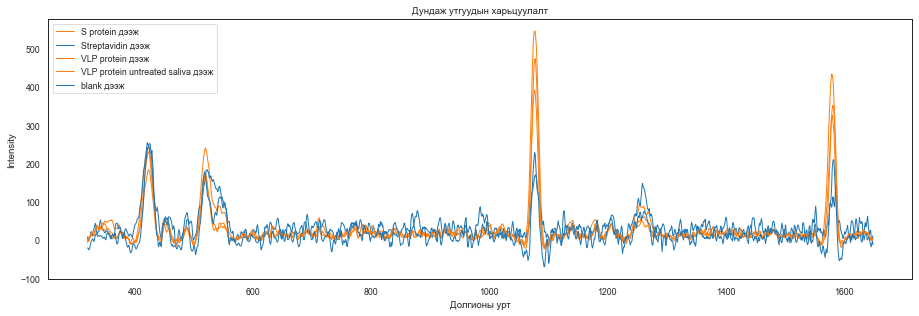

In [102]:
fig, ax = plt.subplots()

for i in range(len(avg_intensity)):
    ax.plot(wavelength, avg_intensity[i], label=f'{avg_y[i]} дээж', color=custom_colors[0 if avg_y[i] == 'blank' or avg_y[i] == 'Streptavidin' else 1])

ax.set_xlabel('Долгионы урт')
ax.set_ylabel('Intensity')
ax.set_title('Дундаж утгуудын харьцуулалт')
# ax.set_xticks(custom_xticks)
ax.legend()

# plt.savefig('../figures/ComparisonOfMeanSpectrumOfDiagnosticLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)
# plt.savefig('../figures/Paper_ComparisonOfMeanSpectrumOfDiagnosticLabels_2024_Winter.png', dpi=600, bbox_inches='tight', transparent=True)

plt.show()